In [2]:
import pandas as pd

# Option 2: forward slashes instead of backslashes
df = pd.read_csv('C:/Users/CKT/Downloads/HousePriceProject/house_prices.csv')

print(df.head())


   Size  Location  Number of Rooms   Price
0  1500     urban                3  350000
1  1200  suburban                2  280000
2  1800     urban                4  420000
3   900     rural                2  200000
4  2000     urban                5  500000


Missing values in each column:
Size               0
Location           0
Number of Rooms    0
Price              0
dtype: int64

Summary statistics:
              Size  Number of Rooms          Price
count    15.000000        15.000000      15.000000
mean   1453.333333         3.133333  334000.000000
std     403.319559         1.060099  106957.935657
min     800.000000         2.000000  190000.000000
25%    1150.000000         2.000000  250000.000000
50%    1500.000000         3.000000  330000.000000
75%    1750.000000         4.000000  410000.000000
max    2100.000000         5.000000  520000.000000


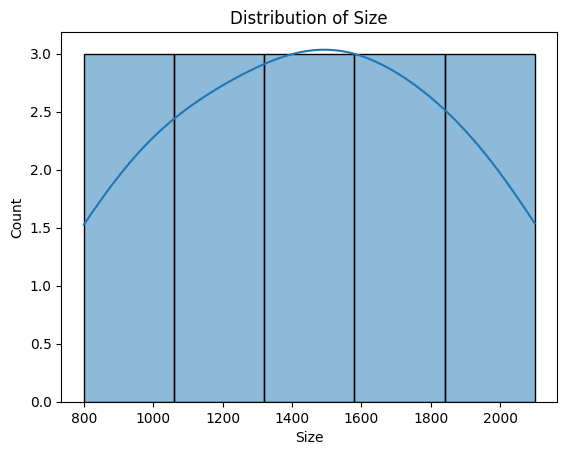

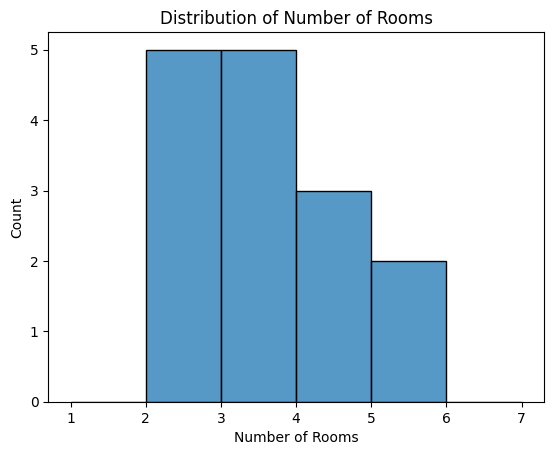

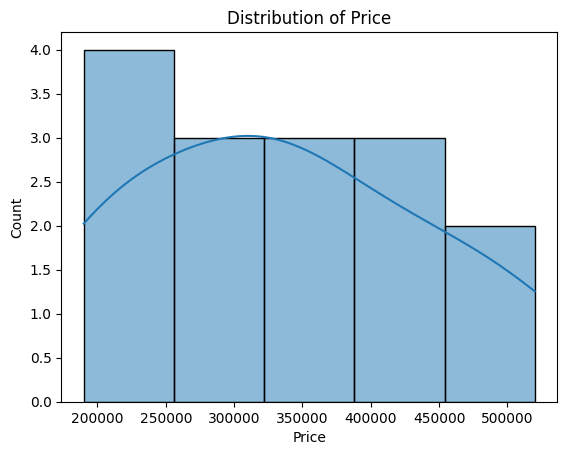

In [3]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Summary statistics for numeric columns
print("\nSummary statistics:")
print(df.describe())

# Distribution plots (requires matplotlib and seaborn)
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['Size'], kde=True)
plt.title('Distribution of Size')
plt.show()

sns.histplot(df['Number of Rooms'], bins=range(1,8), kde=False)
plt.title('Distribution of Number of Rooms')
plt.show()

sns.histplot(df['Price'], kde=True)
plt.title('Distribution of Price')
plt.show()


In [4]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separate features and target
X = df.drop('Price', axis=1)
y = df['Price']

# Columns
num_features = ['Size', 'Number of Rooms']
cat_features = ['Location']

# Define transformers
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(drop='first')  # drop='first' to avoid dummy variable trap

# Create ColumnTransformer to apply transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ])

# Apply transformations and create processed feature set
X_processed = preprocessor.fit_transform(X)

print("Transformed feature shape:", X_processed.shape)


Transformed feature shape: (15, 4)


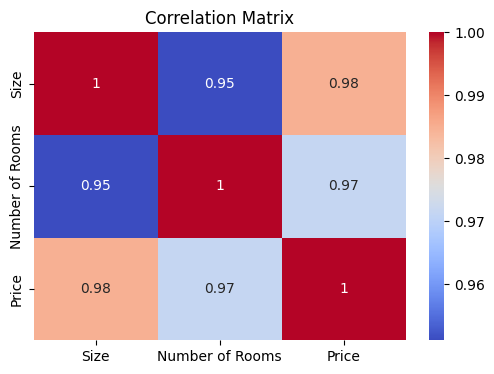

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix of numeric features only
corr = df[['Size', 'Number of Rooms', 'Price']].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42)

# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)

print("Model training completed!")


Model training completed!


RMSE: 7469.05
R² Score: 0.98


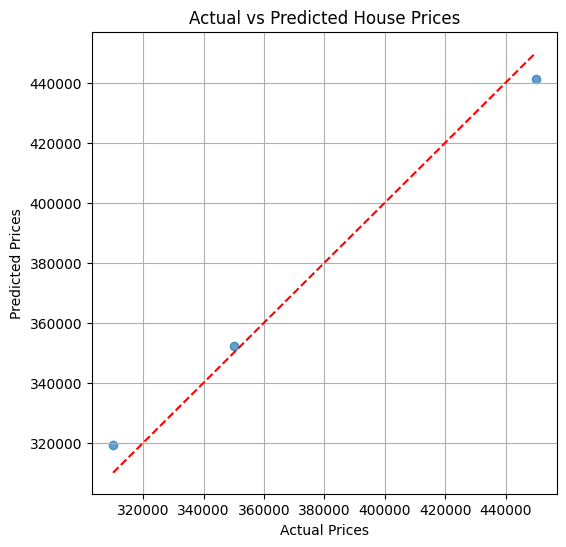

In [9]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Predict on test set
y_pred = model.predict(X_test)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R² score (coefficient of determination)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Plot Actual vs Predicted prices
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.grid(True)
plt.show()
